# EDA(Exploratory Data Analysis) : 탐색적 데이터 분석

* 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정입니다. 
* 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정입니다.
* 데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있습니다. 이를 통해, 본격적인 분석에 들어가기에 앞서 데이터의 수집을 결정할 수 있습니다.
* 다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 다양한 패턴을 발견하고, 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있습니다.

## 1. 데이터 로드

* Titanic Dataset : https://www.kaggle.com/brendan45774/test-file

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
titanic = pd.read_csv("data/titanic.csv")

## 2. 데이터 확인

### (1) 데이터 모양 확인

* survived : 생존=1, 죽음=0
* pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
* sibsp : 함께 탑승한 형제 또는 배우자 수
* parch : 함께 탑승한 부모 또는 자녀 수
* ticket : 티켓 번호
* cabin : 선실 번호
* embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [157]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### (2) 데이터 타입 확인
* 범주형 변수의 경우 object 또는 string, 수치형 변수의 경우 int64 혹은 float 64로 맞추어주면 됩니다.
* 범주형 변수의 경우 값이 문자열로 들어가 있으면 알아서 object 타입이 되지만, 
* 만약의 숫자로 된 범주형 변수의 경우 int64 등으로 잘못 타입이 들어가 있는 경우가 있습니다. 형변환이 필요함

In [8]:
titanic.info() # Survived와 PClass 변수가 범주형 int64로 잘못 되어있으므로 형변환을 합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


### (3) 형변환

In [104]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

### (4) 데이터 결측치 확인

* Null 값이 있는 경우, 크게 그 값을 빼고 하는지, - Complete data analysis
* 혹은 결측치를 대치하는지 2개의 방법으로 나눌 수 있습니다. - Imputation

In [10]:
titanic.isnull().sum() # Cabin 변수가  687 행이 missing이고 Embarked가 2개의 행이 missing인 것을 확인하

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


## 3. 종속 변수 체크

* 기본적으로 종속변수의 분포를 살펴봅니다. 종속변수란 다른 변수들의 관계를 주로 추론하고, 최종적으로는 예측하고자 하는 변수입니다. 

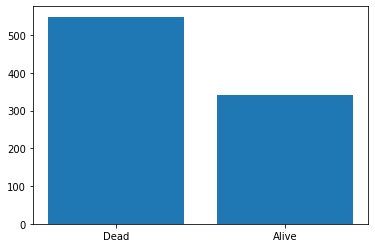

In [47]:
plt.bar((0, 1), titanic['Survived'].value_counts())
plt.xticks((0, 1), ('Dead','Alive'))

#titanic['Survived'].value_counts().plot(kind='bar')

plt.show()

## 4. 명목형 변수의 분포 살펴보기

* 명목형 변수를 어떻게 다룰지를 판단
* 카테고리수가 너무 많고, 종속변수와 별로 관련이 없어보이는 독립 변수들은 빼고 분석하는 것이 나을 수도 있습니다.

In [55]:
# for col in titanic.columns :
#     if titanic[col].dtypes == "object":
#         print(col)

category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [58]:
# 데이터의 기본키(인덱스), 종속변수 등을 제외
category_feature = list(set(category_feature) - set(['PassengerId','Survived'])) 

category_feature

['Ticket', 'Embarked', 'Pclass', 'Sex', 'Cabin', 'Name']

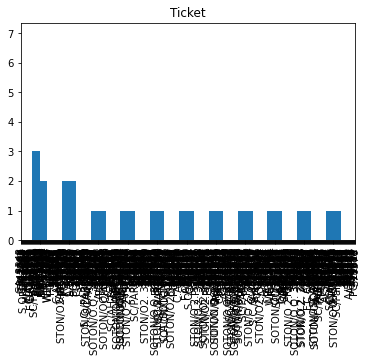

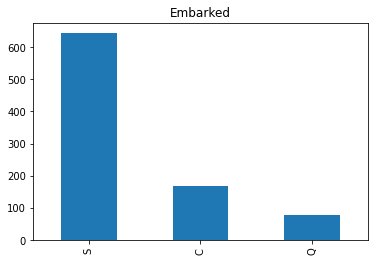

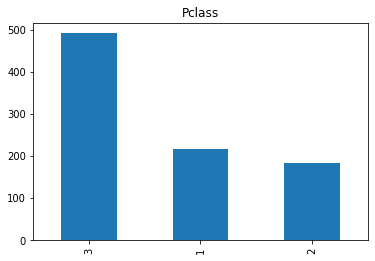

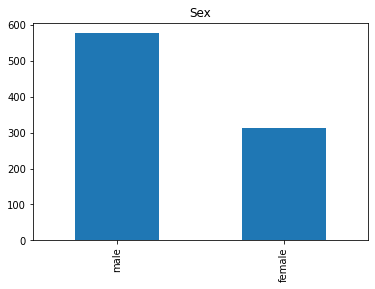

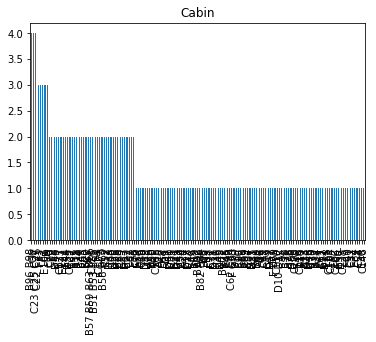

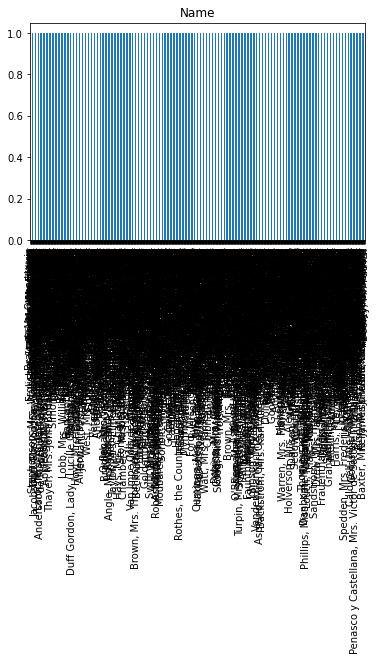

In [63]:
for col in category_feature: 
    titanic[col].value_counts().plot(kind='bar') 

    plt.title(col)
    plt.show()

In [80]:
def bar_chart(feature):
    alive = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([alive, dead])
    df.index = ['Alive','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

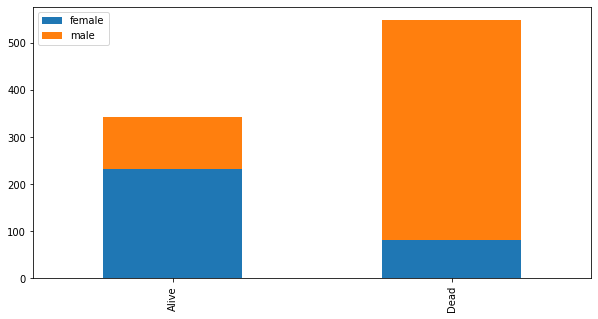

In [81]:
bar_chart('Sex')

# 차트는 여성이 남성보다 생존할 가능성이 더 높다는 것을 확인시켜 준다

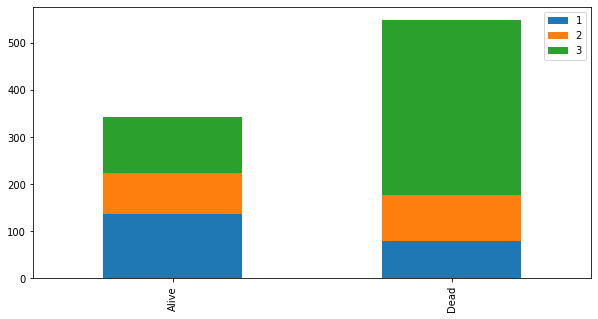

In [83]:
bar_chart('Pclass')

# 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다는 것을 확인시켜 준다
# 차트는 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높다는 것을 확인시켜 준다

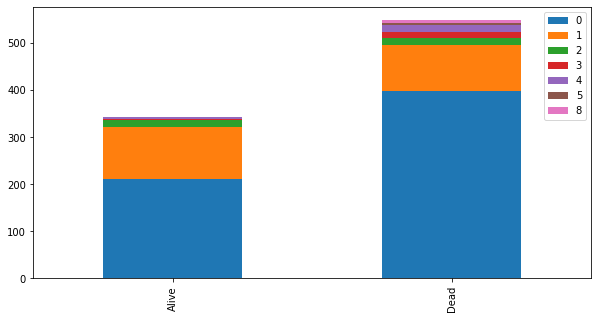

In [84]:
bar_chart('SibSp')

# 차트는 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

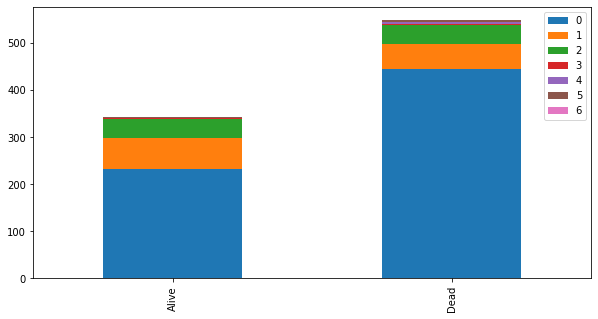

In [85]:
bar_chart('Parch')

# 차트는 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

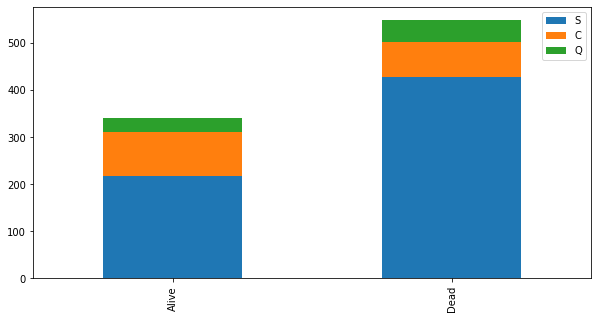

In [86]:
bar_chart('Embarked')

# C 선착장 탑승자의 경우 생존자가 더 많지만 다른 선착장 탑승자는 죽은 사람이 더 많을 가능성을 보여준다

## 5. 이변수 탐색

* 성별-생존의 관계 파악처럼 두 변수의 관계를 파악하기

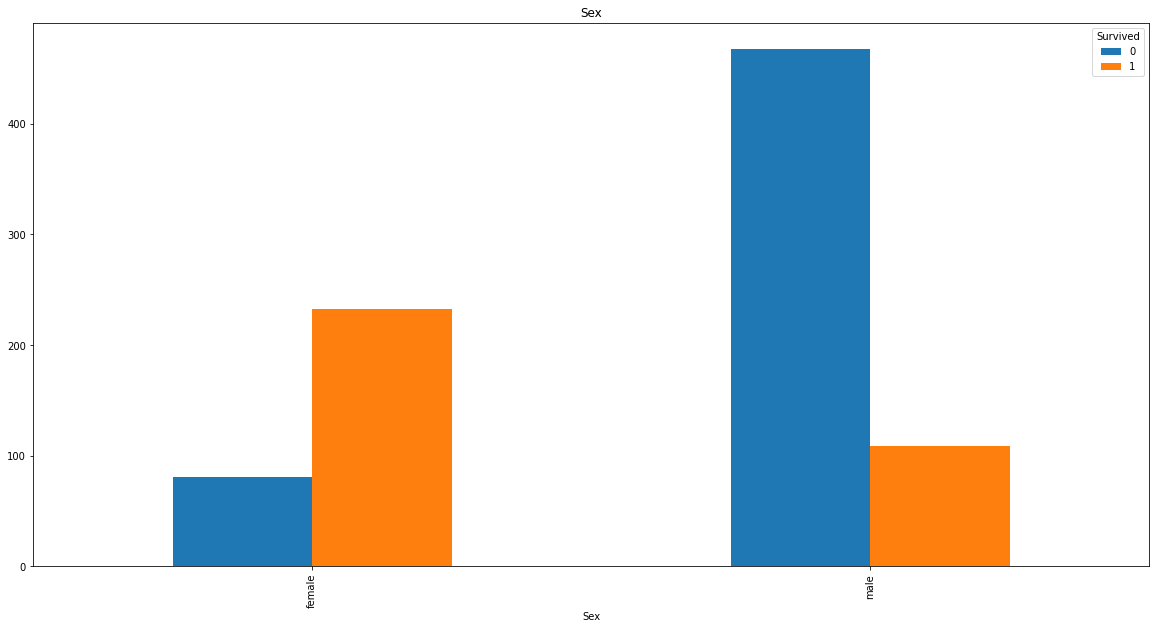

In [87]:
sex_df = titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex')
plt.show()

# 차트는 여성이 남성보다 생존할 가능성이 더 높다는 것을 확인시켜 준다

## 6. 수치형 변수의 분포 살펴보기

In [65]:
# 전체 변수 중에서 범주형 변수와 기타 인덱스 변수, 종속변수들을 제외하고 수치형 변수만
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['PassengerId','Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

### (1) 단변수 탐색
* 단변수 탐색은 seaborn 패키지의 distplot 함수를 이용하면 매우 편합니다.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


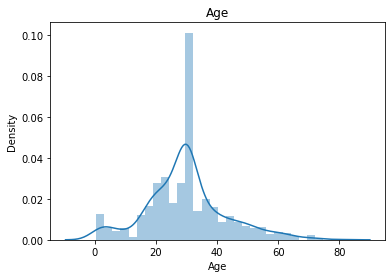

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


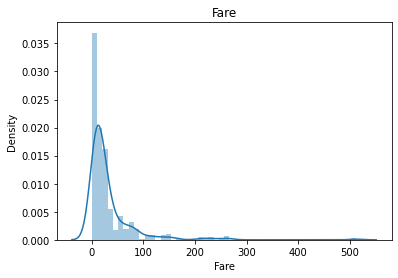

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


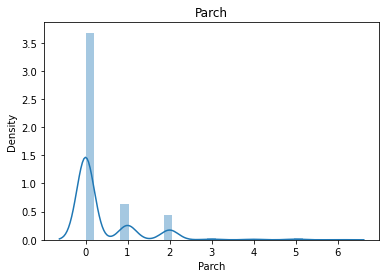

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


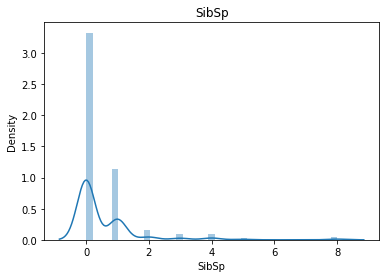

In [66]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

### (2) 이변수, 삼변수 탐색
* seaborn 패키지의 pairplot을 통해 종속변수를 포함한 3개의 변수를 한 번에 볼 수 있도록 플로팅합니다.
* pairplot은 어러 변수의 관계를 한 번에 파악할 수 있으며,  hue 파라미터를 통해 종속변수를 지정함으로써 세 변수의 관계를 파악할 수 있습니다.

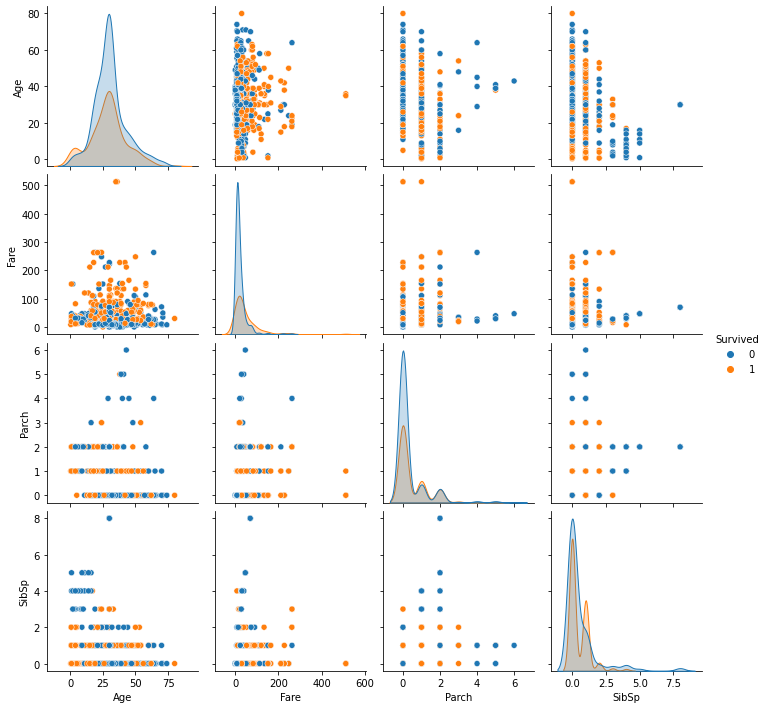

In [67]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

## 7. 수치형, 명목형 변수 간의 관계 탐색
* 수치형-명목형 간의 관계를 파악해 보는 것입니다. 
* 예를 들어, 성별, 나이, 생존여부 3개의 변수를 동시에 탐색하고 싶을 수 있습니다. 
* 이 경우에 명목형 변수에 따라 수치형변수의 boxplot을 그려봄으로써 대략적인 데이터의 형태를 살펴볼 수 있습니다.

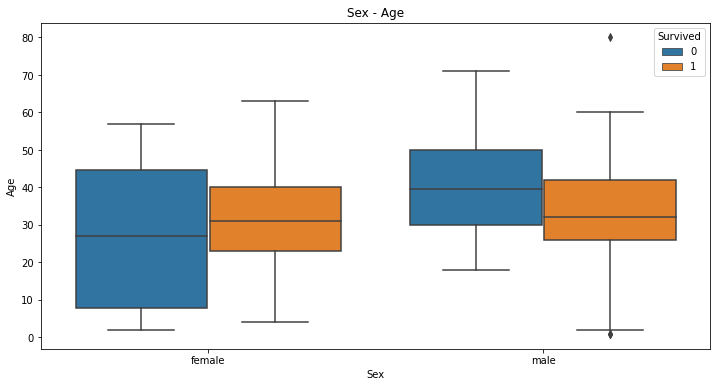

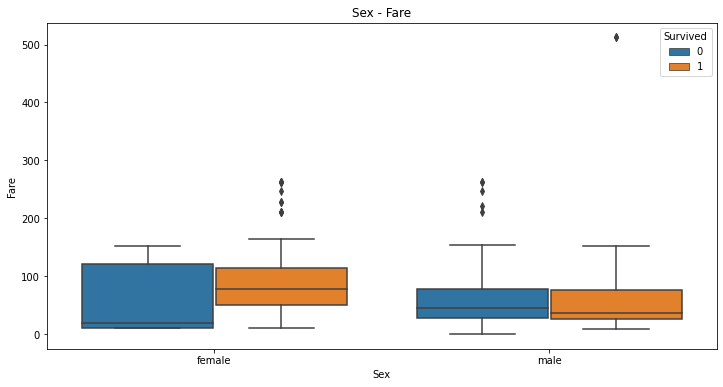

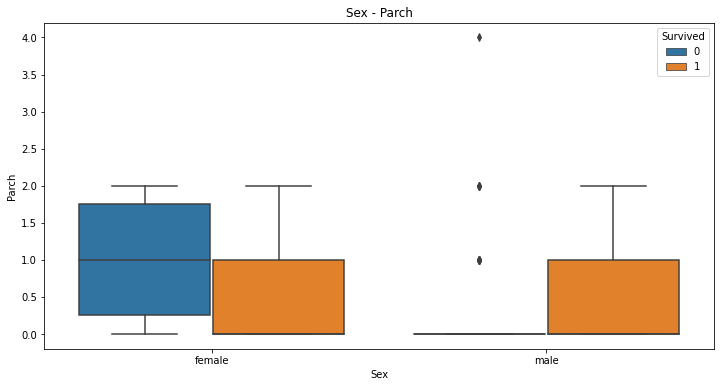

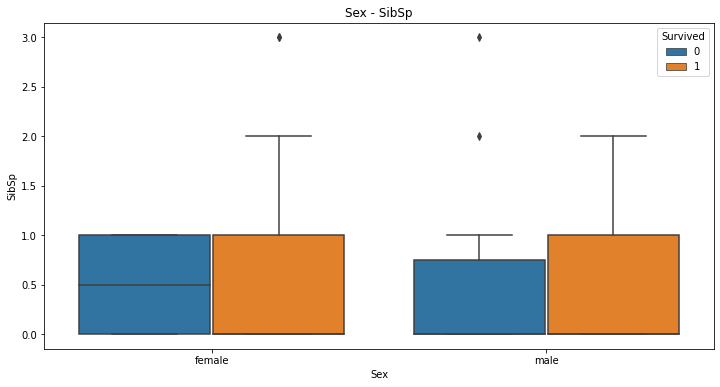

In [68]:
unique_list = titanic['Sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=titanic.dropna())
    plt.title("Sex - {}".format(col))
    plt.show()

## 8. Feature Engineering

### (1) Name
* name에 따라서 사람이 죽었다 살았다 판단하지는 못할 것이다. 
* 그렇지만 남성과 여성을 나타내는 Mr., Miss, Mrs. 와 같은 중요한 정보가 있다. 이름에서 이 타이틀들을 빼 내고 이름 항목을 삭제

In [158]:
#titanic['Name']
titanic['Title'] = titanic['Name'].str.extract('([A-za-z]+)\.', expand=False)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [159]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [160]:
# 각 호칭을 숫자에 매핑 시키자.
# Mr: 0
# Miss: 1
# Mrs: 2
# Others: 3

title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }


titanic['Title'] = titanic['Title'].map(title_mapping)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


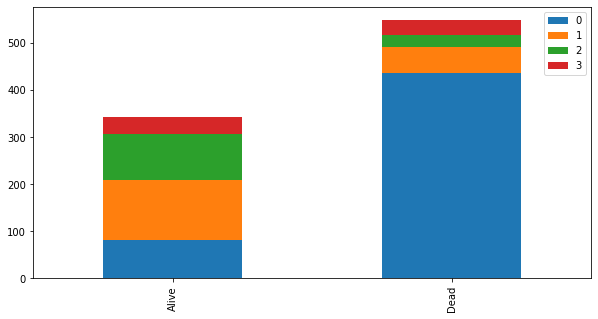

In [112]:
bar_chart('Title')

# 0번 Mr.(남성)은 상대적으로 많이 죽었음을 알 수 있다. 반면 1번과 2번 Miss와 Mrs.(여성)은 상대적으로 많이 생존했음을 알 수 있다.

In [161]:
titanic.drop('Name', axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### (2) Sex
* 남자인지 연자인지 이미 명확히 구분되어 있는 정보로 텍스트를 숫자로만 변환시켜 주겠다.

In [162]:
sex_mapping = {"male": 0, "female":1}

titanic['Sex'] = titanic['Sex'].map(sex_mapping)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


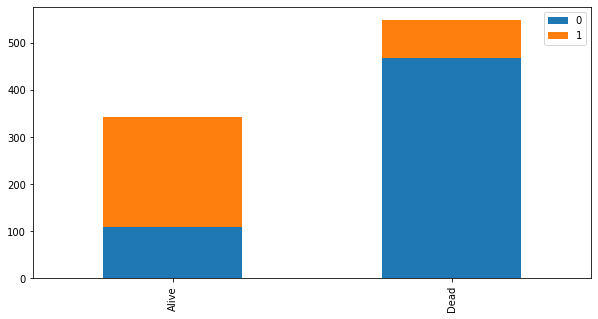

In [115]:
bar_chart('Sex')

### (3) Age
* 만약, 결측치가 있다면, Age를 각 Title에 대한 연령의 중간값으로 채운다(Mr, Mrs, Miss, Others)

In [118]:
titanic['Age'].fillna(titanic.groupby('Title')['Age'].transform('median'), inplace=True)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


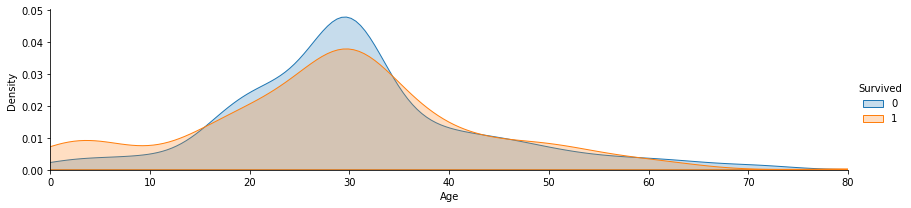

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

# 10대 중반 정도까지는 생존률이 높고 30대 부근과 70대 근처의 노인분들의 사망률이 높다는 것을 알 수 있다.

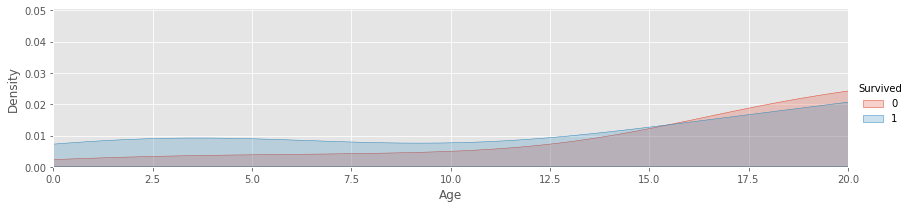

In [134]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(0, 20) # ~ 20대
plt.style.use('ggplot')

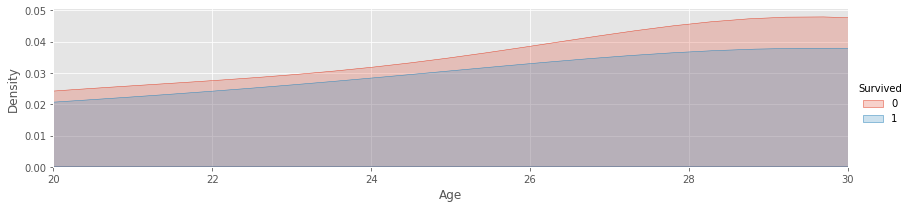

In [132]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(20, 30) # 20 ~ 30대
plt.style.use('ggplot')

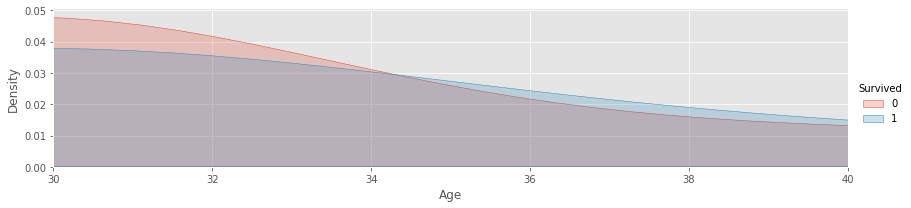

In [136]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(30, 40) # 30 ~ 40대
plt.style.use('ggplot')

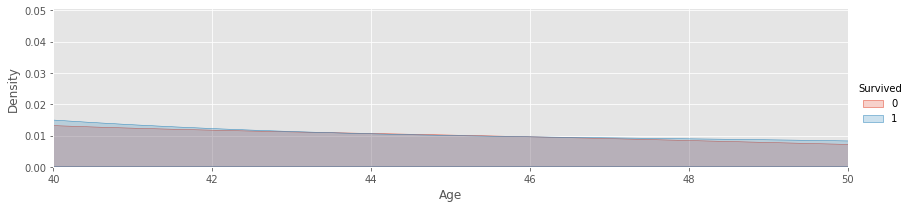

In [137]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(40, 50) # 40 ~ 50대
plt.style.use('ggplot')

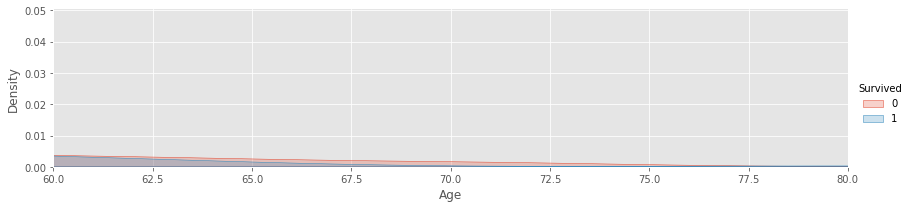

In [138]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(60) # 60대 ~ 
plt.style.use('ggplot')

In [164]:
# 비닝
titanic['Age_Group'] = pd.cut(titanic['Age'], 5)

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,"(16.336, 32.252]"
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,"(32.252, 48.168]"
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.336, 32.252]"
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,"(32.252, 48.168]"
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3,"(16.336, 32.252]"
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1,"(16.336, 32.252]"
888,889,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,1,"(16.336, 32.252]"
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0,"(16.336, 32.252]"


In [165]:
titanic['Age_Group'].value_counts().sort_index()

(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_Group, dtype: int64

In [169]:
bins=[0, 16, 32, 48, 64, 80]
labels=['~ 16', '16 ~ 32', '32 ~ 48', '48 ~ 64', ' 64 ~ 80']
titanic['Age_Group'] = pd.cut(titanic['Age'], bins, labels=labels)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,16 ~ 32
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,32 ~ 48
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,16 ~ 32
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,32 ~ 48
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,32 ~ 48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3,16 ~ 32
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1,16 ~ 32
888,889,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,1,16 ~ 32
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0,16 ~ 32


In [170]:
titanic['Age_Group'].value_counts().sort_index()

~ 16        100
16 ~ 32     523
32 ~ 48     188
48 ~ 64      69
 64 ~ 80     11
Name: Age_Group, dtype: int64

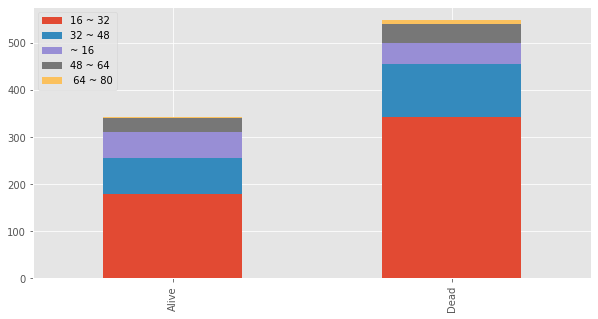

In [171]:
bar_chart('Age_Group')

### (4) Embarked

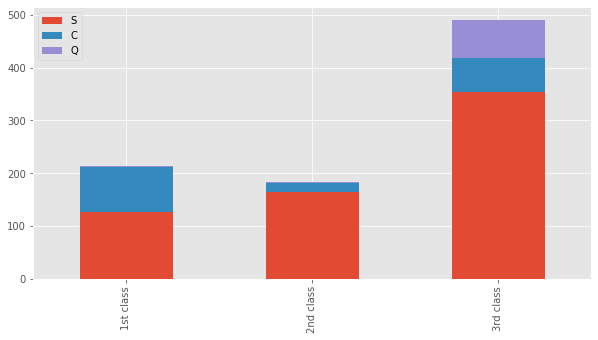

In [174]:
Pclass1 = titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

# Q 도시에서 탄 사람들은 1등급이 거의 없다. 
# S 도시에서 탑승한 사람들이 대부분을 차지하고 있다. 
# 즉, Embarked 정보가 쓰여있지 않다면 S라고 써도 무방할 것 같다.

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### (5) Fare
* 만약, 결측치가 있다면, 티켓 가격은 클래스과 관련이 높다. 
* 그리고 클래스는 결측치가 존재하지 않았다. 그러므로 각 클래스의 티켓 가격 가운데 값을 티켓 가격의 결측치에 넣어주겠다.

In [178]:
titanic['Fare'].isnull().sum()

0

In [177]:
titanic["Fare"].fillna(titanic.groupby('Pclass')['Fare'].transform('median'), inplace=True)

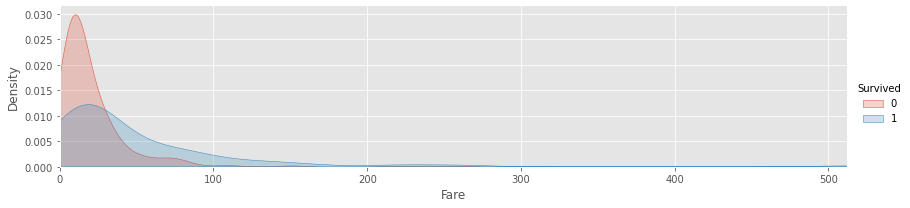

In [182]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, titanic['Fare'].max()))
facet.add_legend()

plt.show()

# 싼 티켓을 구매한 사람은 사망률이 높고 비싼 티켓을 구매한 사람은 생존률이 높다는 것을 알 수 있다.

In [183]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,16 ~ 32
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,32 ~ 48
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,16 ~ 32
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,32 ~ 48
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,32 ~ 48


### (6) Cabin

In [189]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [190]:
titanic['Cabin'].isnull().sum()

687

In [187]:
titanic['Cabin_Group'] = titanic['Cabin'].str[:1]
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Cabin_Group
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,16 ~ 32,NaN
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,32 ~ 48,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,16 ~ 32,NaN
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,32 ~ 48,C
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,32 ~ 48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3,16 ~ 32,NaN
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1,16 ~ 32,B
888,889,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,1,16 ~ 32,NaN
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0,16 ~ 32,C
